1. Intro

The dataset has been retrieved from Kaggle.com, focusing on the topic of heart failure. In this case, the analysis aims to predict mortality due to heart failure. The target audience for this analysis includes researchers and medical professionals interested in understanding the features that contribute to heart failure. The following statistical models and analyses will help us comprehend and predict the relationship between symptoms and heart failure.

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report, precision_recall_curve, roc_auc_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from scikitplot.metrics import plot_roc_curve


# create a output file
output_path = r'D:\Damon_Kaggle_Projects\Project2_HeartFailurePrediction\output'

2. Preprocessing

In [34]:
# reading DataFrame
df = pd.read_csv(r'D:\Damon_Kaggle_Projects\Project2_HeartFailurePrediction\heart_failure_clinical_records_dataset.csv')

In [35]:
# check missing values 
null_counts = df.isna().sum()

print(null_counts)

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


2.1 Remove outliers

In [37]:
# then, removing outliers
def remove_outliers(df):
    for col in df.columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3-q1
        upper_bound = q3 + 1.5 * iqr
        lower_bound = q1 - 1.5 * iqr
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
        return df
    
df = remove_outliers(df)

2.2 Split numerical features and categorical features

In [38]:
# Detecting outliers

numerical_features = []
categorical_features = []

for col in df.columns:
    if df[col].isin([0,1]).all():
        categorical_features.append(col)
    else:
        numerical_features.append(col)


numerical_features_df = df[numerical_features]
categorical_features_df = df[categorical_features]

numerical_features_df.to_csv(output_path+r'\numerical_features.csv')
categorical_features_df.to_csv(output_path+r'\categorical_features.csv')

3. Approaches

3.1 Boxplot

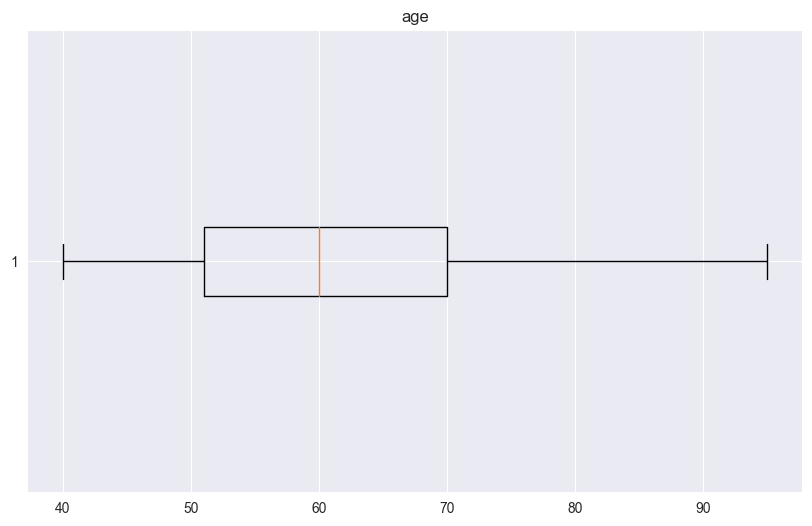

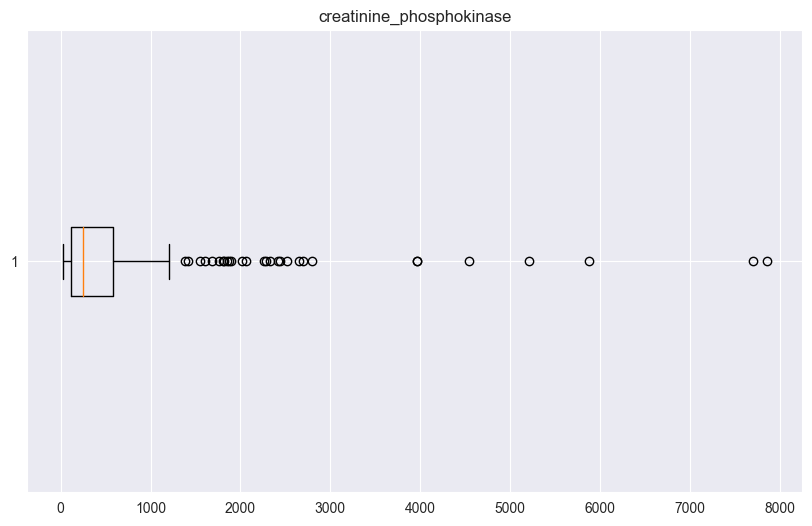

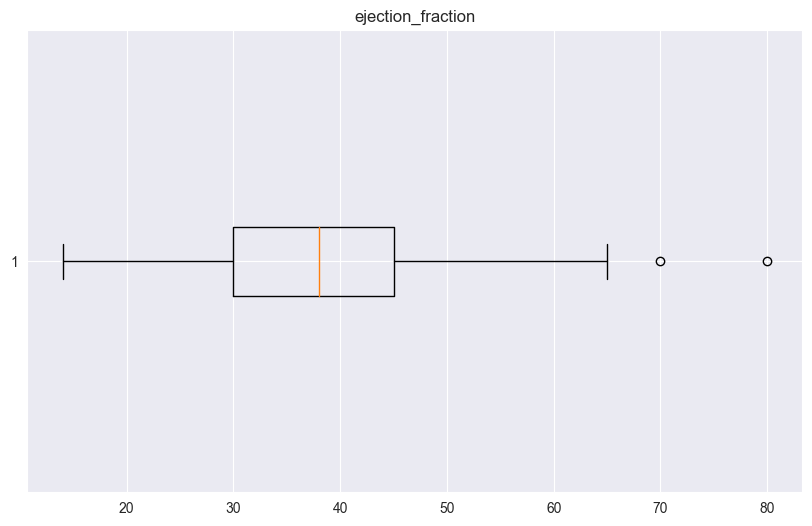

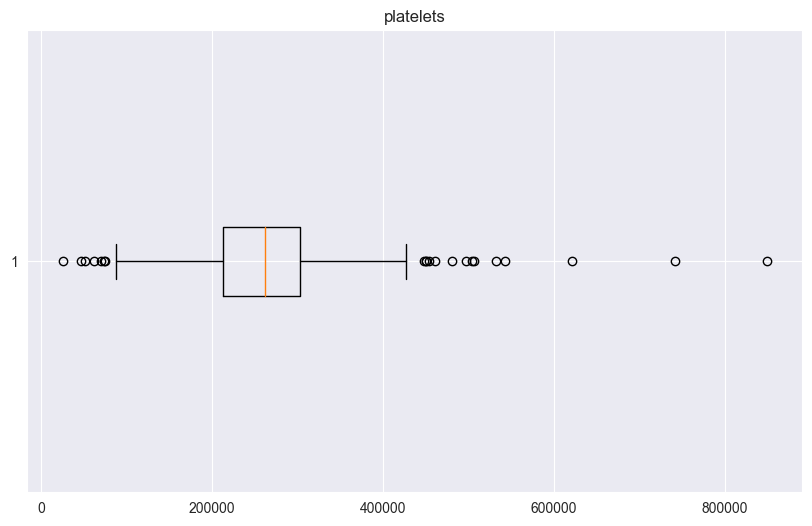

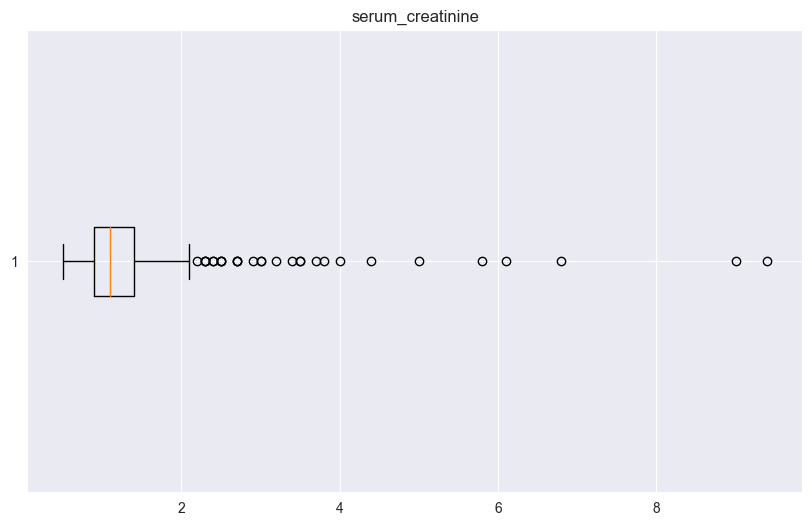

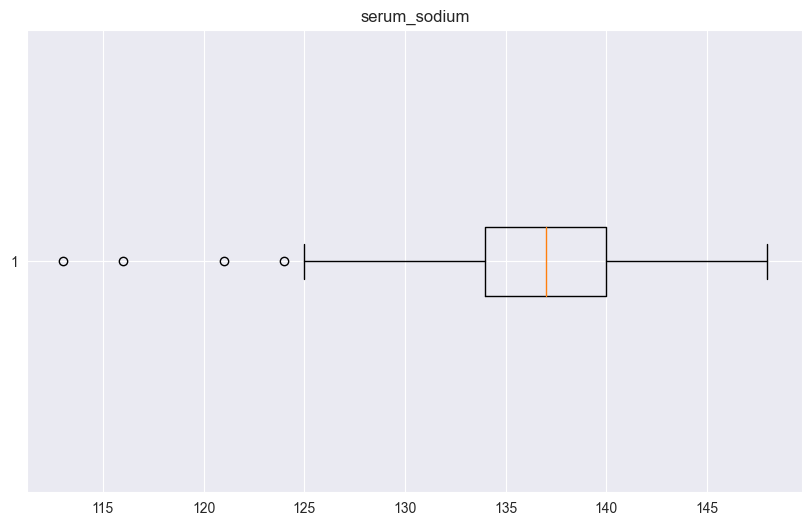

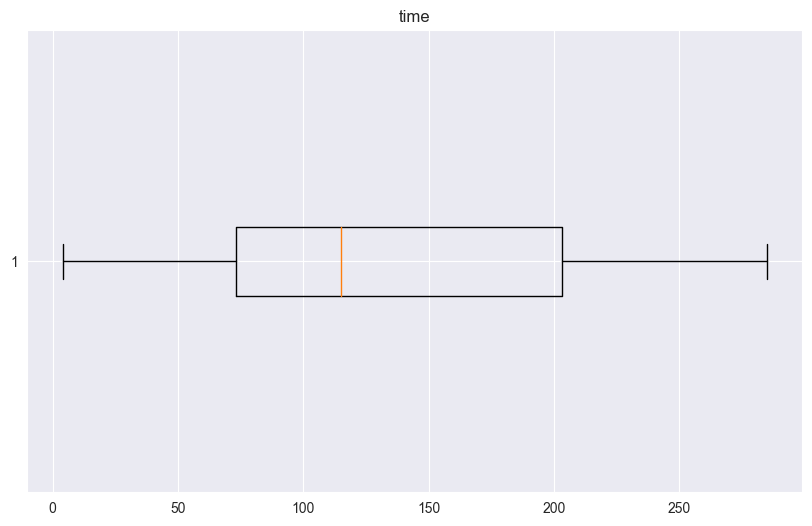

In [39]:
# creating boxplot for every features in DataFrame

for col in numerical_features_df:
    plt.boxplot(numerical_features_df[col], vert = False)
    plt.title(col)
    plt.show()

3.2 Feature Distribution

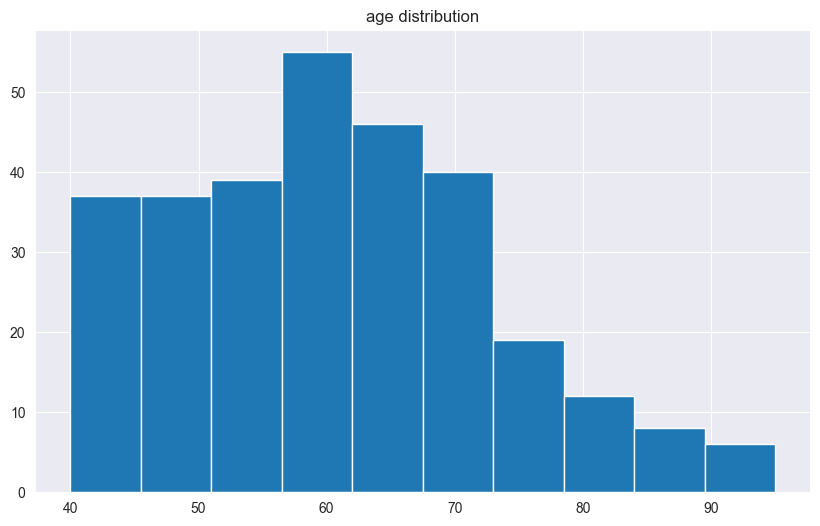

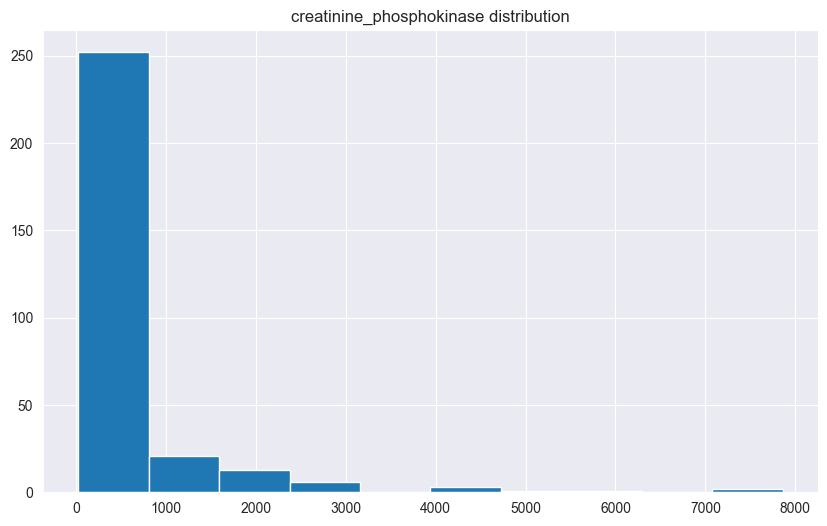

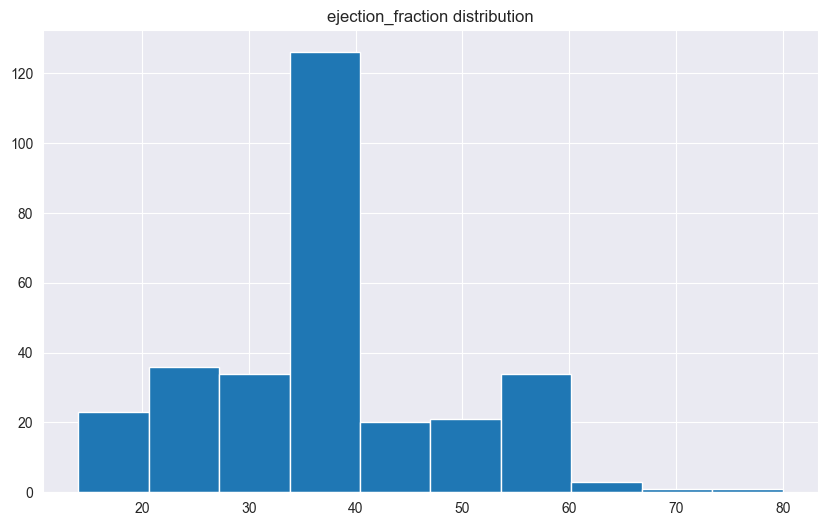

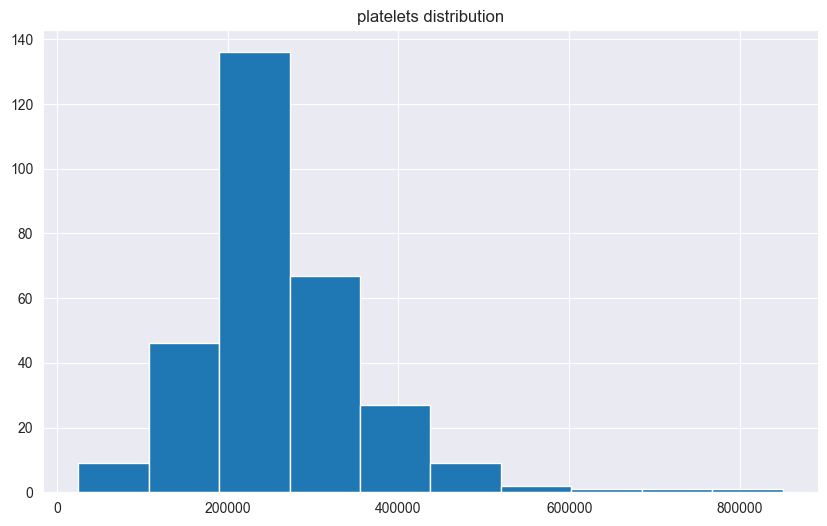

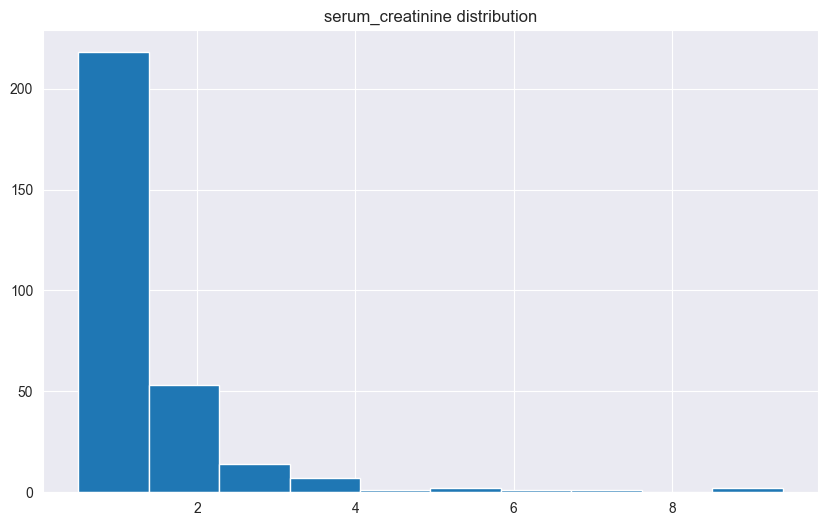

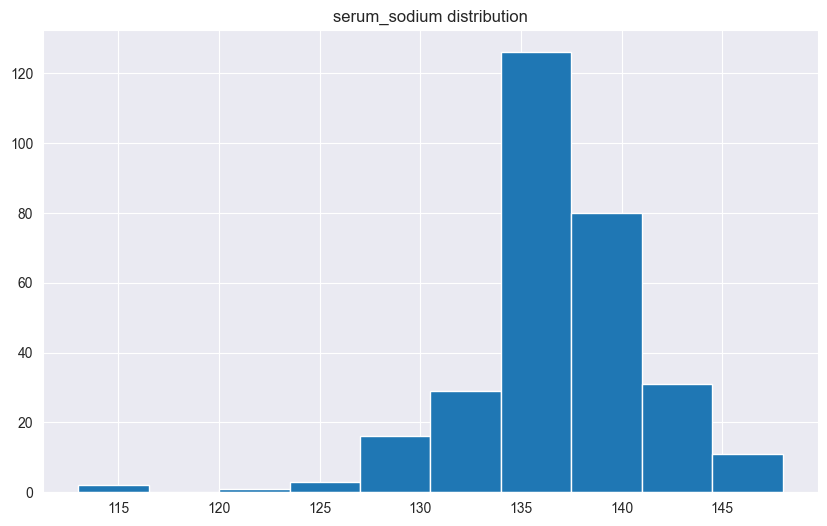

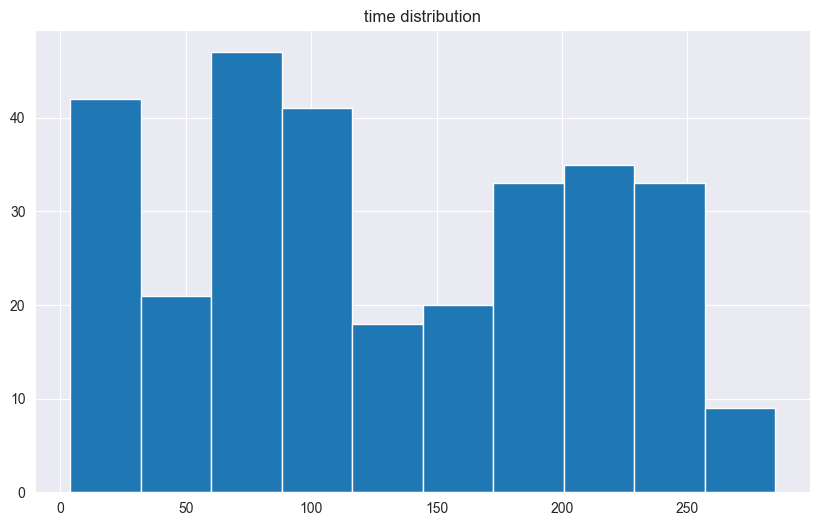

In [40]:
# create distribution charts of each numerical feature for a better understanding of the dataset 
for i in numerical_features_df:
    plt.hist(df[i])
    plt.title(i + ' distribution')
    plt.show()

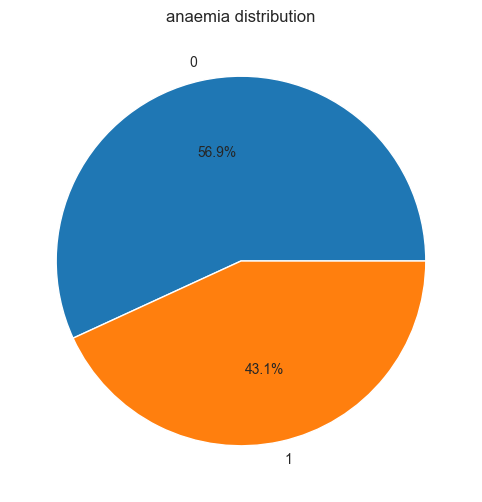

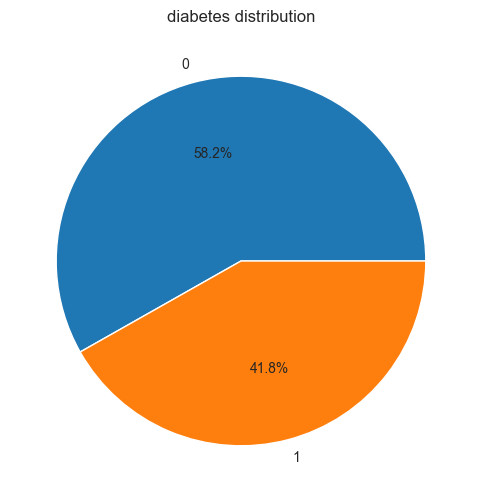

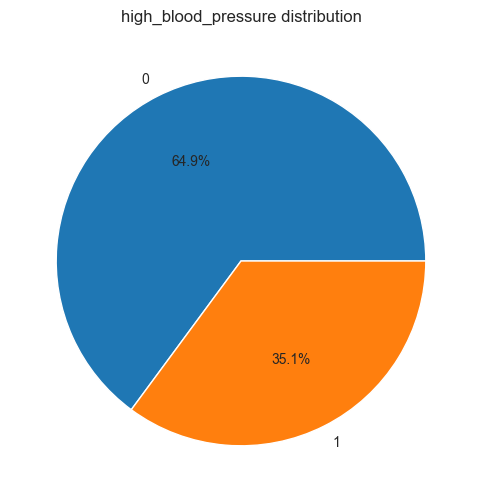

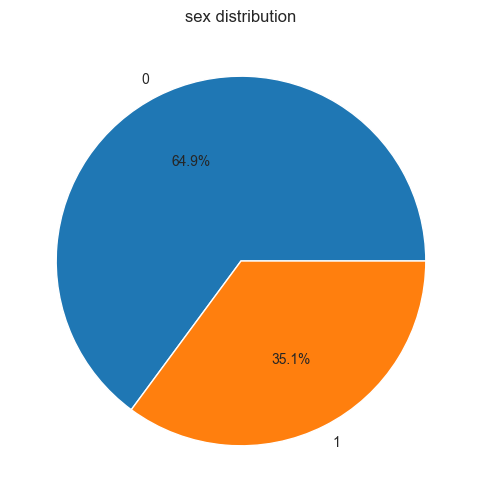

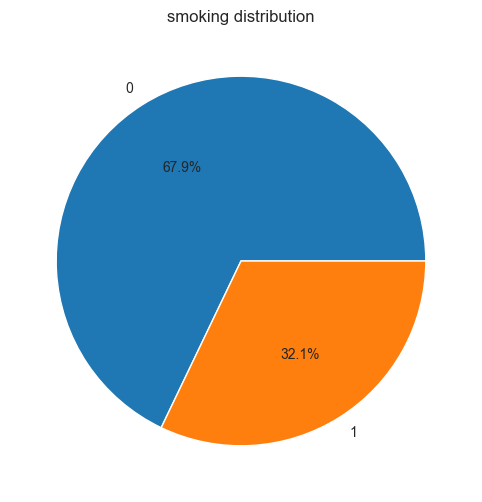

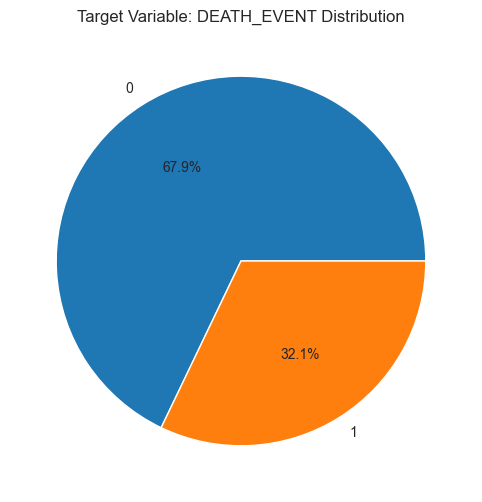

In [41]:
# create distribution charts of each categorical feature

for i in categorical_features_df:
    if i == 'DEATH_EVENT':
        plt.title('Target Variable: DEATH_EVENT Distribution')
    else:
        plt.title(i + ' distribution')
    
    plt.pie(df[i].value_counts(), autopct='%1.1f%%', labels=[0,1])
    plt.show()

The target variable distribution is displayed above. 

3.3 Exploratory Data Analysis

3.3.1 Numerical Features vs. Target Variable

In [42]:
df['DEATH_EVENT'].value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

His plot & Box plot

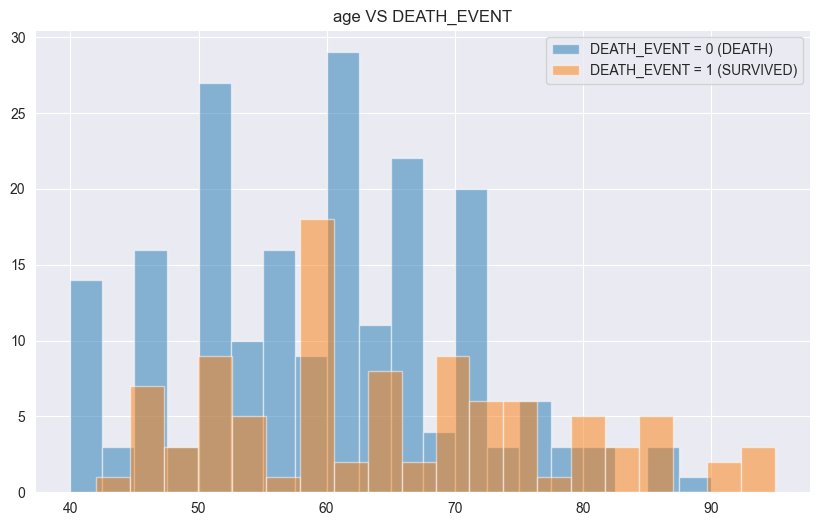

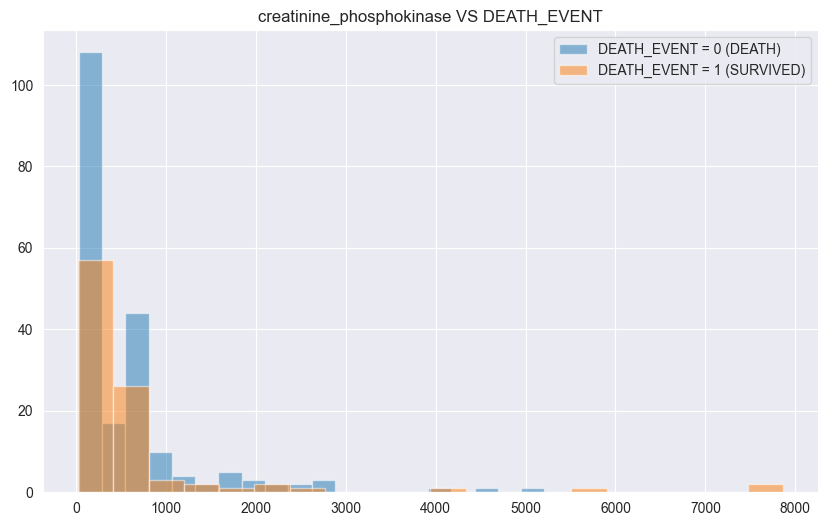

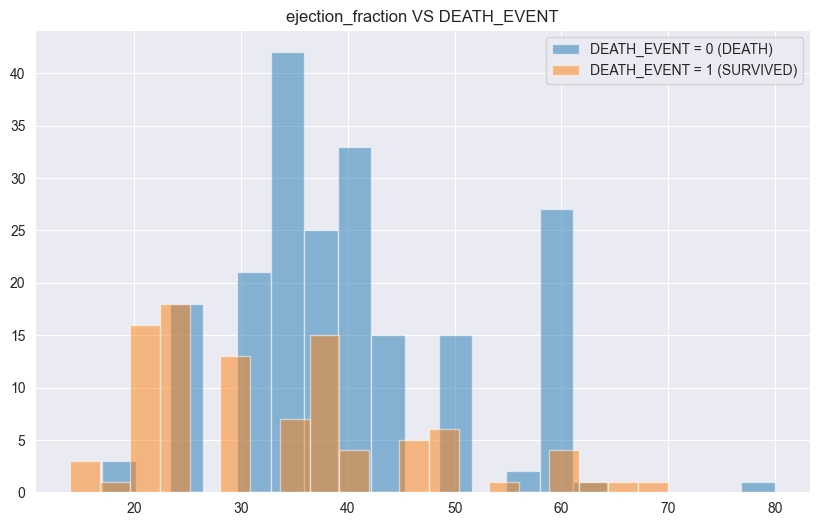

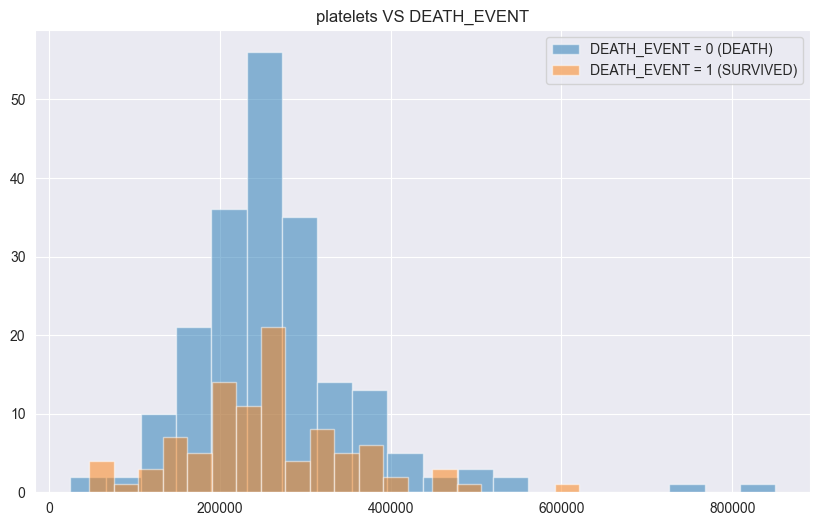

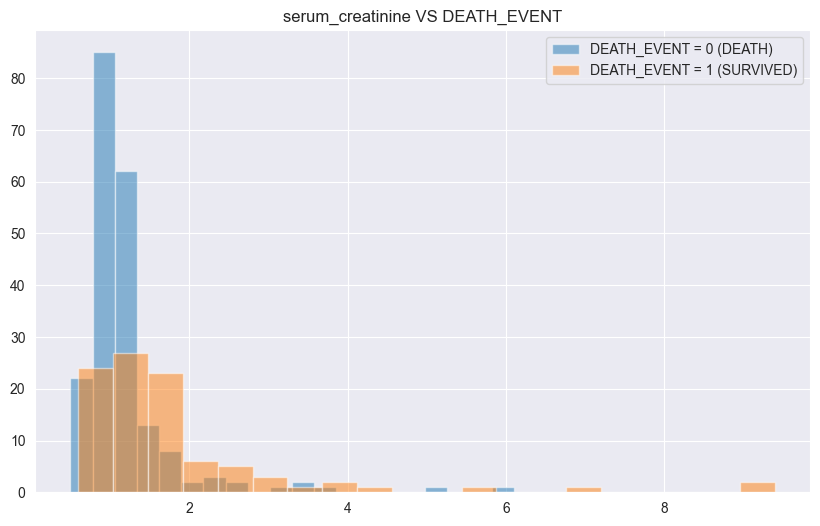

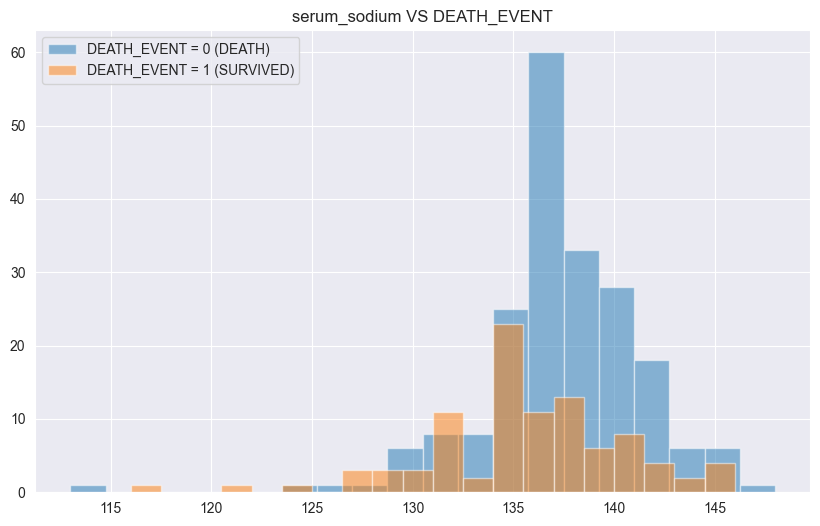

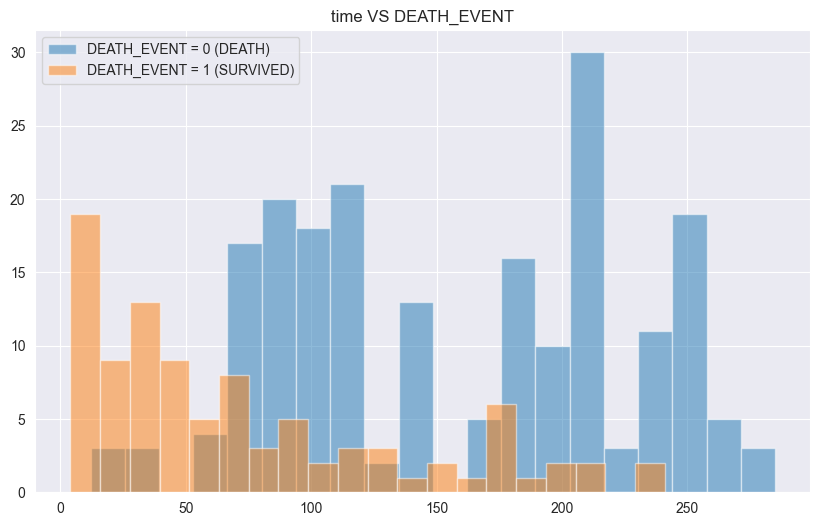

In [43]:
for i in numerical_features_df:
    plt.hist(df[df['DEATH_EVENT'] == 0][i], bins=20, alpha=0.5, label = 'DEATH_EVENT = 0 (DEATH)')
    plt.hist(df[df['DEATH_EVENT'] == 1][i], bins=20, alpha=0.5, label = 'DEATH_EVENT = 1 (SURVIVED)')
    plt.title(f'{i} VS DEATH_EVENT')
    plt.legend()
    plt.show()

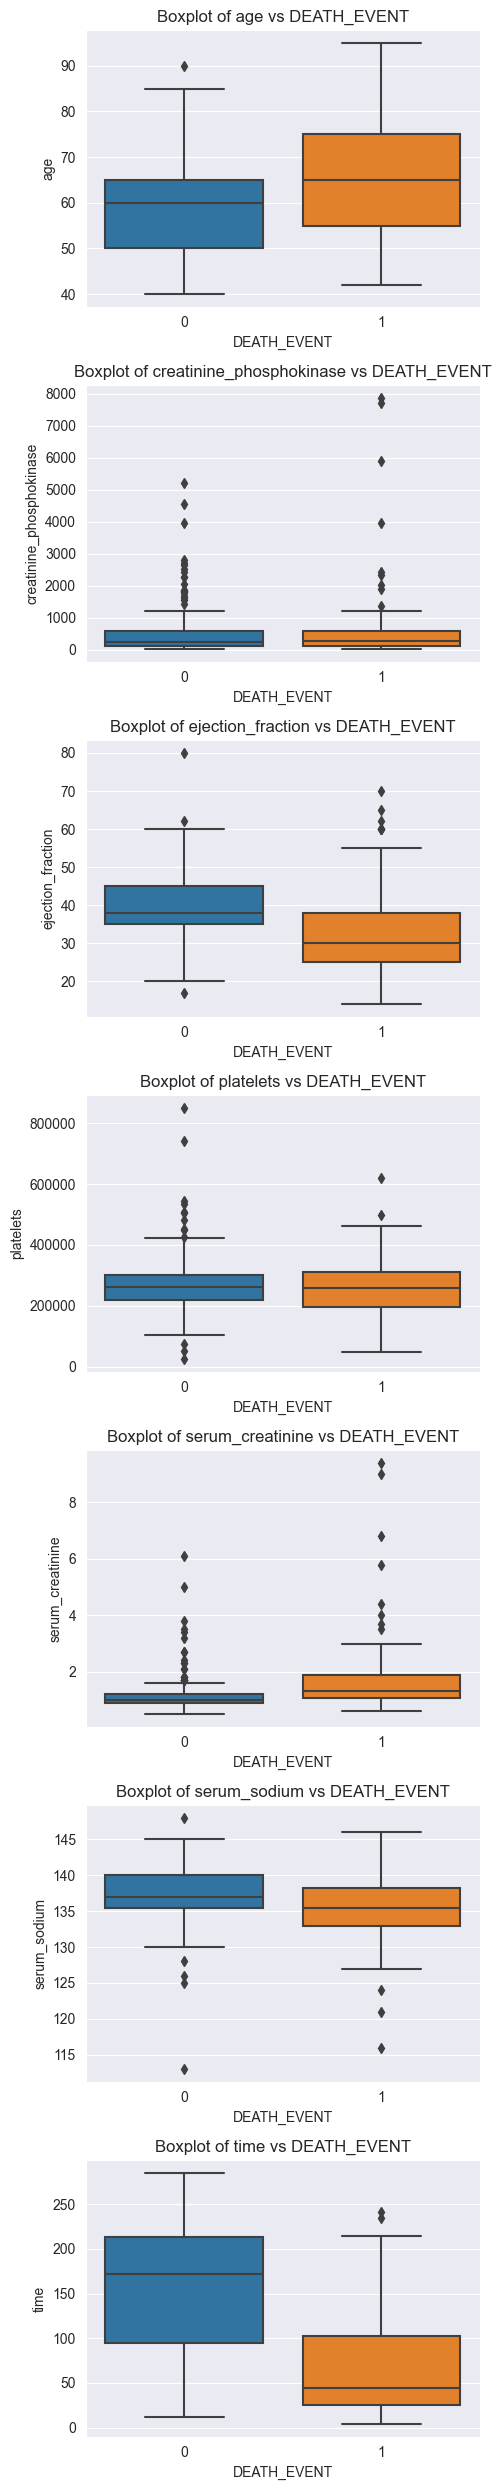

In [44]:
index = 0 
plt.figure(figsize=(5, 25))
for col in numerical_features_df:
    index += 1
    plt.subplot(7, 1, index)
    sns.boxplot(x='DEATH_EVENT', y=col, data=df)  # Use 'df' instead of 'numerical_features_df'
    plt.title(f'Boxplot of {col} vs DEATH_EVENT')
plt.tight_layout()
plt.show()


Insight:
1. The Age group dramatically increases the chance of getting heart failure and starts 50 to 70. 
2. High cases having heart failures under 40% of enjection fraction. 
3. serum_creatinine values higher than 1.2 have higher probability to lead to DEATH_EVENT.
4. Petients with value of 135-140 serum sodium are facing a greater possibility of getting heart failure. 
5. time in the range of 25 - 100 is a strong indicator of for DEATH_EVENT.

3.3.2 Categorical Features VS. Target Variable

In [45]:
df['sex'].value_counts()

sex
1    194
0    105
Name: count, dtype: int64

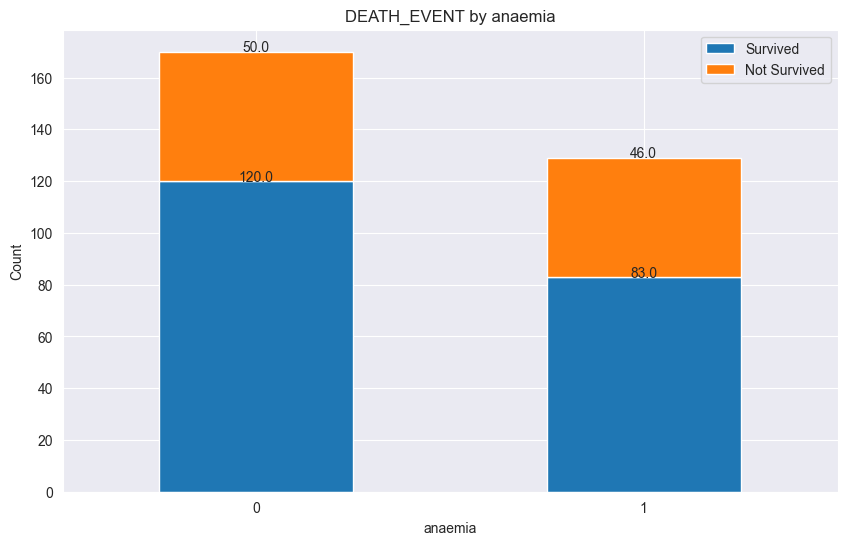

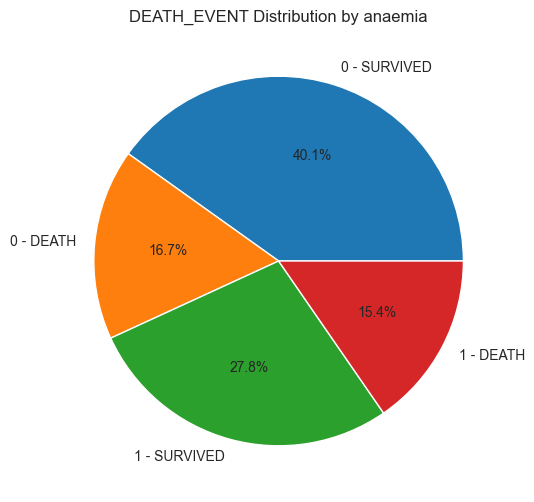

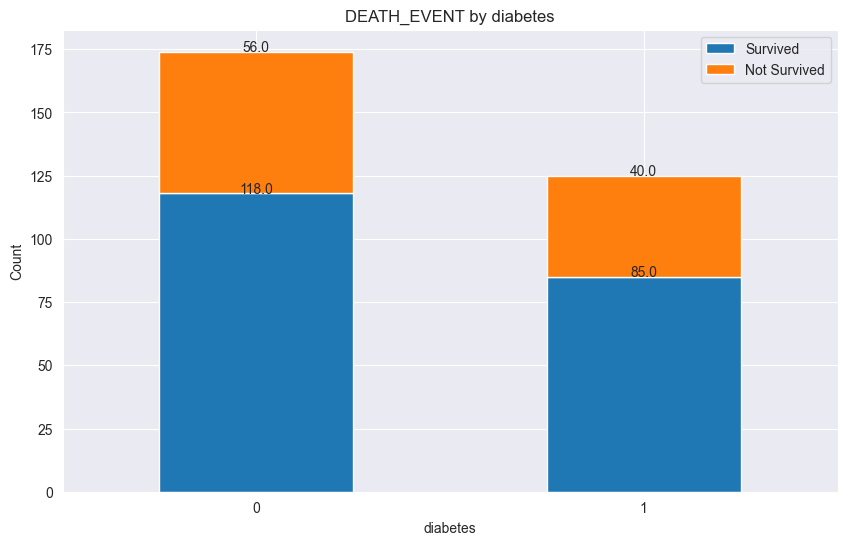

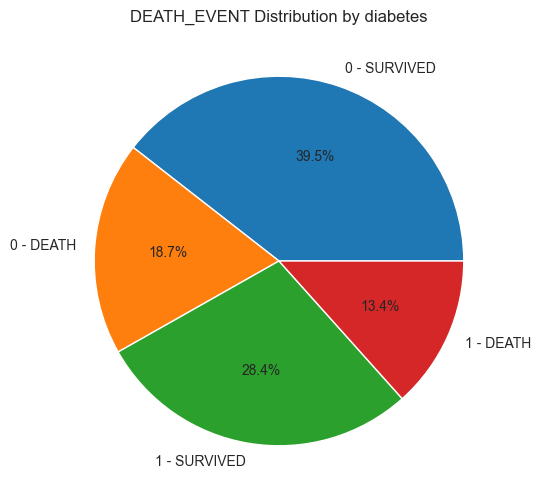

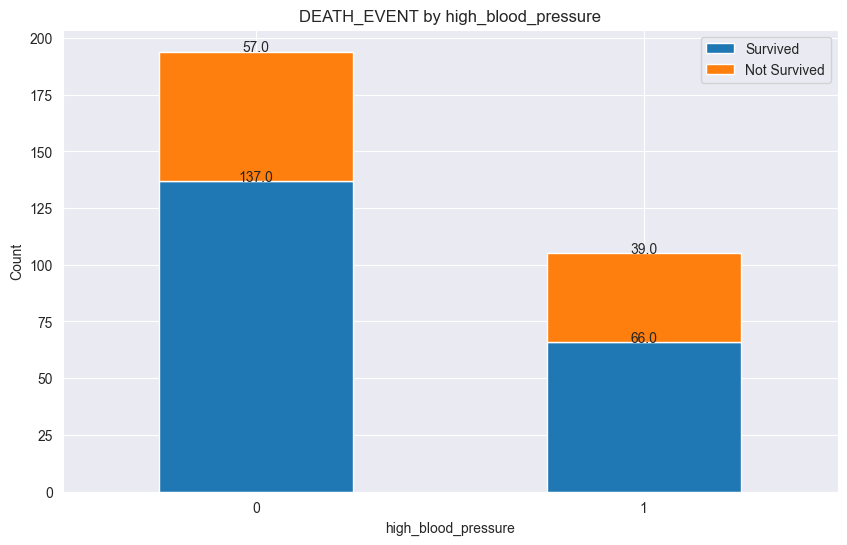

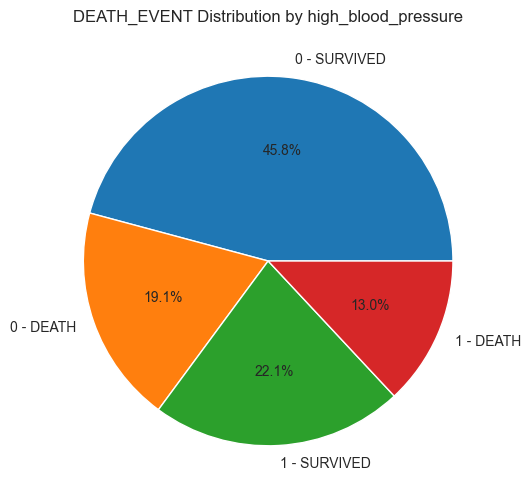

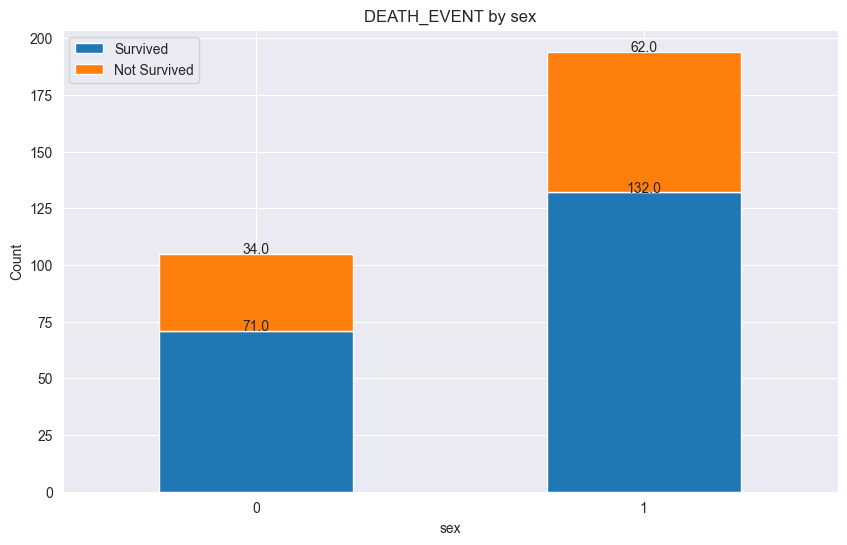

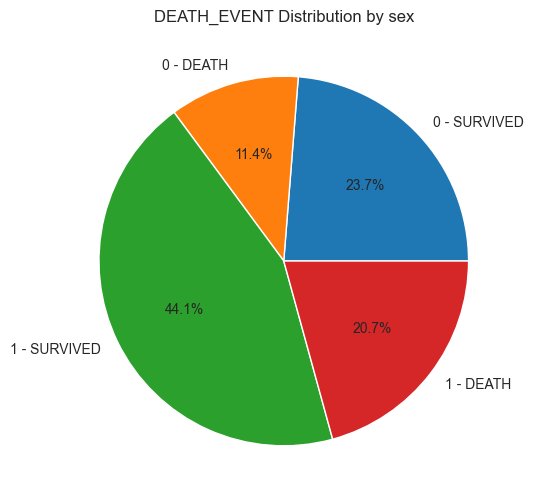

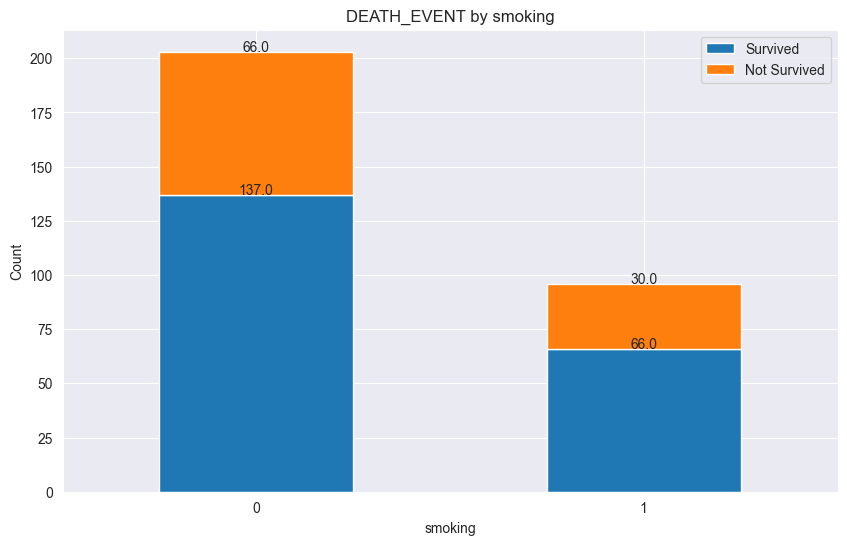

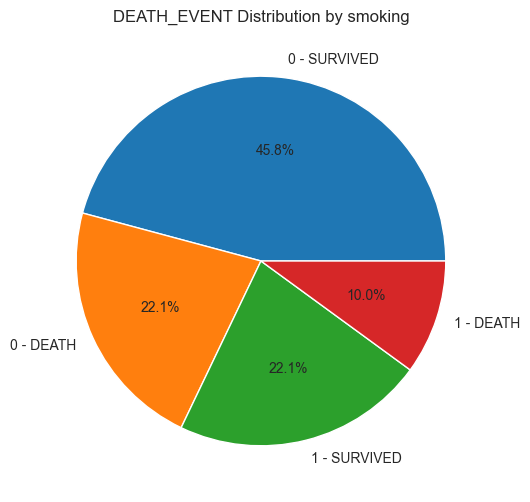

In [46]:
def generate_comparison_plots(df, target_feature='DEATH_EVENT'):
    categorical_columns = [col for col in df.columns if col != target_feature]

    for col in categorical_columns:
        # generate stacked bar chart
        grouped_data = df.groupby([col, target_feature]).size().unstack()
        ax = grouped_data.plot(kind='bar', stacked=True)
        plt.title(f'{target_feature} by {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=0)
        plt.legend(['Survived', 'Not Survived'])

        # add labels
        for p in ax.patches:
            width = p.get_width()
            height = p.get_height()
            x, y = p.get_xy()
            ax.annotate(f'{height}', (x + width/2, y + height), ha='center')

        plt.show()

        # generate pie chart
        grouped_pie = df.groupby([col, target_feature]).size()
        labels = [f'{val[0]} - SURVIVED' if val[1] == 0 else f'{val[0]} - DEATH' for val in grouped_pie.index]
        plt.figure()
        plt.pie(grouped_pie, labels=labels, autopct='%1.1f%%')
        plt.title(f'{target_feature} Distribution by {col}')
        plt.show()

# 0 = 'Men', 1 = 'Women'
generate_comparison_plots(categorical_features_df)



Insight:
1. Males who have anemia are having a three times higher death rate than males having no anemia. 
2. There is a two-times higher cases of death for male who have diabetes.
3. Higher blood pressure are having a higher death likelihood in Men's group. 
4. Smoking leads a greater death rate than people who don't smoke in Men's group.

3.3.3 Linear Regression

In [47]:
combined_df = pd.concat([numerical_features_df, categorical_features_df], axis=1).drop(columns='DEATH_EVENT')

model = LinearRegression()

X = combined_df  
Y = df['DEATH_EVENT']
model.fit(X, Y)

coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [ 5.76657831e-03  3.42661334e-05 -9.83364951e-03 -8.37030531e-08
  8.52686629e-02 -7.59914458e-03 -2.73284170e-03 -2.76587965e-03
  1.92752033e-02 -1.42967375e-02 -6.36853569e-02 -5.73264398e-03]
Intercept: 1.6635558128941579


The small efficients might be caused by the small sample size. In this case, the low efficients could be ignored. 

3.3.4 Logistic Regression

Accuracy: 0.8833333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92        46
           1       0.77      0.71      0.74        14

    accuracy                           0.88        60
   macro avg       0.84      0.82      0.83        60
weighted avg       0.88      0.88      0.88        60



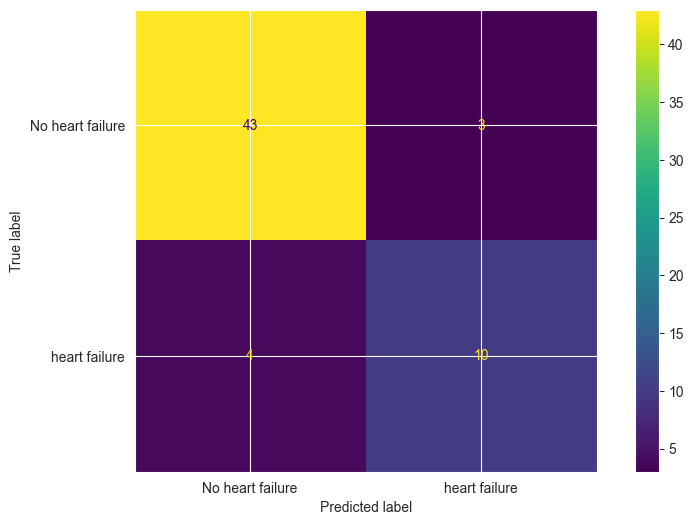

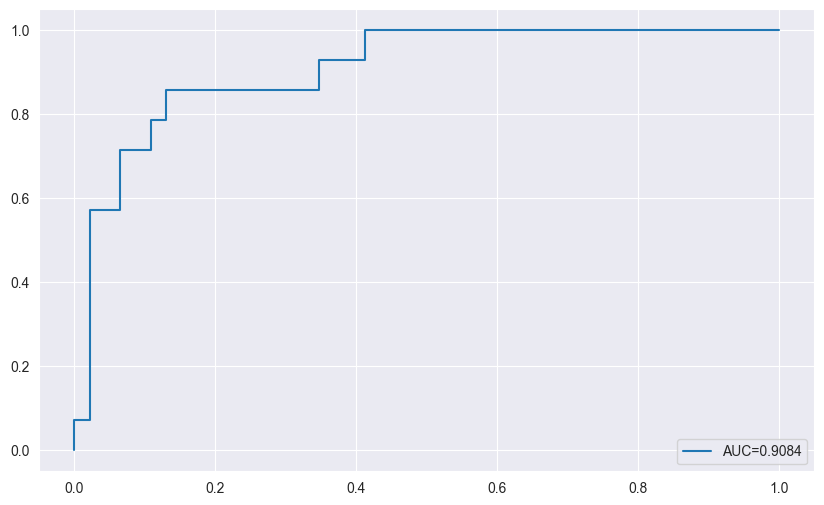

In [48]:
# Extract independent and dependent variables
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split data and train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Standardize data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Create a Logistic Regression model instance
model = LogisticRegression()

# Train the model
model.fit(x_train, y_train)

# Predict
lr_y_pred = model.predict(x_test)

# Evaluate model performance
lr_accuracy = accuracy_score(y_test, lr_y_pred)
lr_report = classification_report(y_test, lr_y_pred)

print("Accuracy:", lr_accuracy)
print("Classification Report:\n", lr_report)

# confusion matrix
cm = confusion_matrix(y_test, lr_y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['No heart failure','heart failure'])
cmd.plot()
plt.show()

# ROC score 
y_true = y_test
lr_y_probs = model.predict_proba(x_test)[:, 1]

# calculate roc_auc
fpr, tpr, _ = metrics.roc_curve(y_true, lr_y_probs)

# calculate roc_auc
lr_roc_auc = roc_auc_score(y_true, lr_y_probs)
lr_roc_auc = round(lr_roc_auc, 4)

# draw roc_auc curve
plt.plot(fpr, tpr, label="AUC=" + str(lr_roc_auc))
plt.legend(loc=4)
plt.show()

3.3.5 Random Forest Classifier

Accuracy: 0.9166666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95        46
           1       0.85      0.79      0.81        14

    accuracy                           0.92        60
   macro avg       0.89      0.87      0.88        60
weighted avg       0.92      0.92      0.92        60



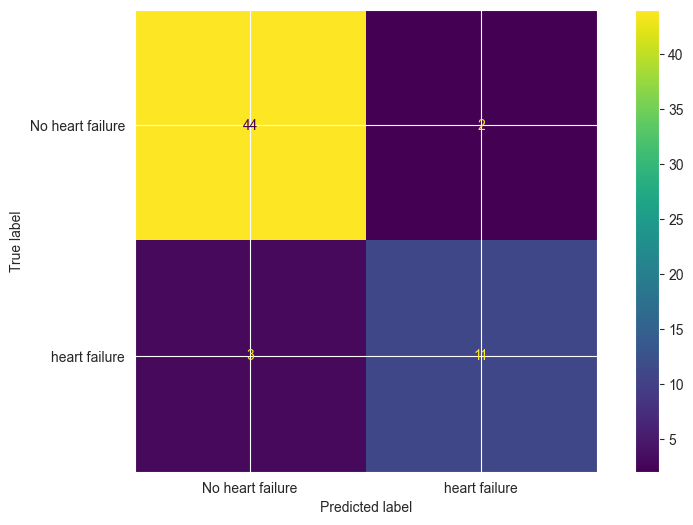

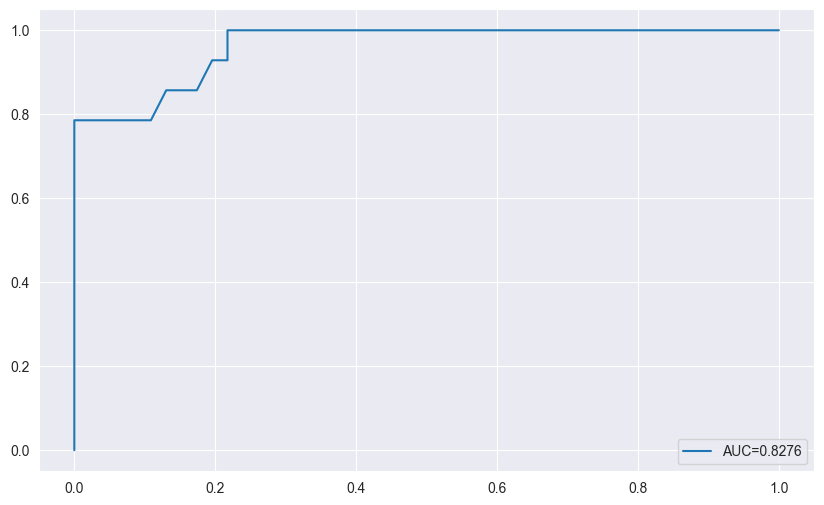

In [49]:
# implementation
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train, y_train)
rf_y_pred = rf_classifier.predict(x_test)

# evaluation
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_report = classification_report(y_test, rf_y_pred)
print("Accuracy:", rf_accuracy)
print("Classification Report:\n", rf_report)

# confusion matrix
cm = confusion_matrix(y_test, rf_y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['No heart failure','heart failure'])
cmd.plot()
plt.show()

# calculate and draw a roc_auc curve
rf_y_pred_proba = rf_classifier.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, rf_y_pred_proba)
rf_roc_auc = metrics.roc_auc_score(y_test, rf_y_pred_proba)
rf_roc_auc = round(rf_roc_auc, 4)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

3.3.6 Decision Tress

Accuracy: 0.8
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.80      0.86        46
           1       0.55      0.79      0.65        14

    accuracy                           0.80        60
   macro avg       0.74      0.80      0.75        60
weighted avg       0.84      0.80      0.81        60



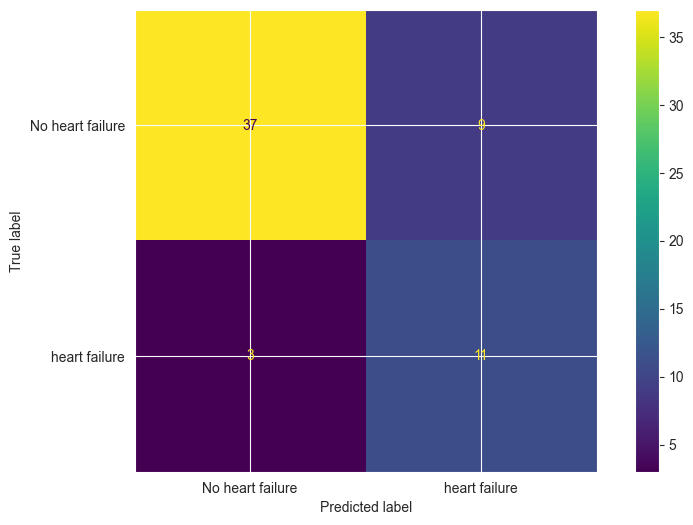

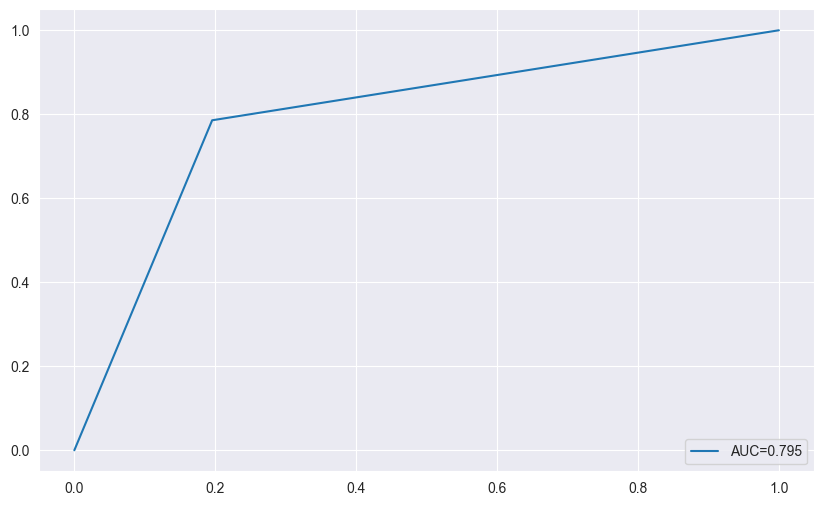

In [50]:
# implementation
dt_clf = DecisionTreeClassifier(random_state=1)
dt_clf.fit(x_train, y_train)
dt_y_pred = dt_clf.predict(x_test)

# evaluation
dt_accuracy = accuracy_score(y_test, dt_y_pred)
dt_report = classification_report(y_test, dt_y_pred)
print("Accuracy:", dt_accuracy)
print("Classification Report:\n", dt_report)

# confusion matrix
cm = confusion_matrix(y_test, dt_y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['No heart failure','heart failure'])
cmd.plot()
plt.show()

# calculate and draw a roc_auc curve
dt_y_pred_proba = dt_clf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, dt_y_pred_proba)
dt_roc_auc = metrics.roc_auc_score(y_test, dt_y_pred_proba)
dt_roc_auc = round(dt_roc_auc, 4)
plt.plot(fpr,tpr,label="AUC="+str(dt_roc_auc))
plt.legend(loc=4)
plt.show()

3.3.7 KNN Classifier

Accuracy: 0.7833333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.87        46
           1       0.56      0.36      0.43        14

    accuracy                           0.78        60
   macro avg       0.69      0.64      0.65        60
weighted avg       0.76      0.78      0.77        60



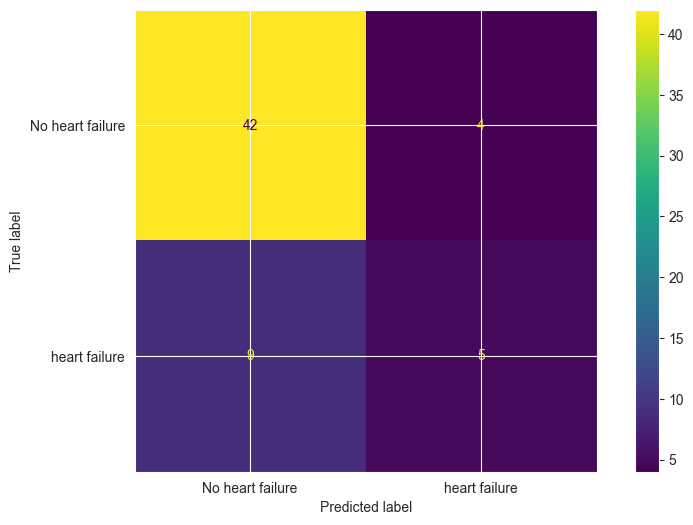

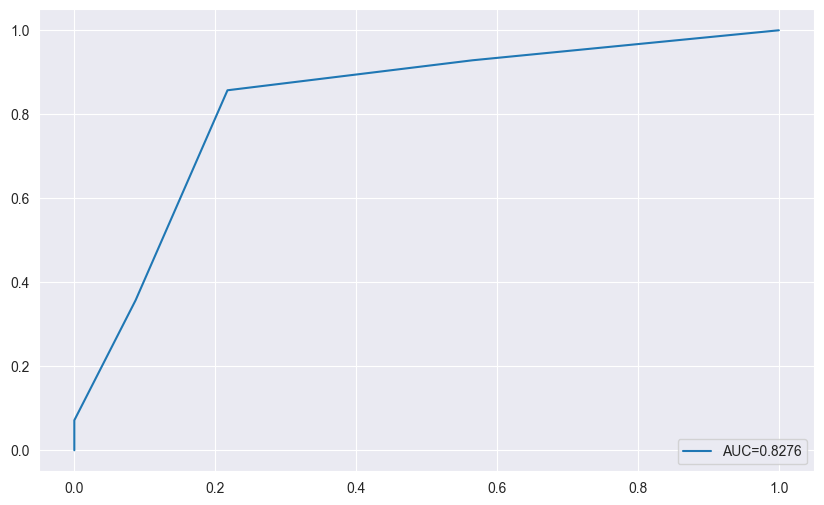

In [51]:
kn_clf = KNeighborsClassifier(n_neighbors=5)
kn_clf.fit(x_train, y_train)
kn_y_pred = kn_clf.predict(x_test)

# evaluation
kn_accuracy = accuracy_score(y_test, kn_y_pred)
kn_report = classification_report(y_test, kn_y_pred)
print("Accuracy:", kn_accuracy)
print("Classification Report:\n", kn_report)

# confusion matrix
cm = confusion_matrix(y_test, kn_y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['No heart failure','heart failure'])
cmd.plot()
plt.show()

# calculate and draw a roc_auc curve
kn_y_pred_proba = kn_clf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, kn_y_pred_proba)
kn_roc_auc = metrics.roc_auc_score(y_test, kn_y_pred_proba)
kn_roc_auc = round(kn_roc_auc, 4)
plt.plot(fpr,tpr,label="AUC="+str(kn_roc_auc))
plt.legend(loc=4)
plt.show()

3.3.8 SVC

Accuracy: 0.8833333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.87        46
           1       0.56      0.36      0.43        14

    accuracy                           0.78        60
   macro avg       0.69      0.64      0.65        60
weighted avg       0.76      0.78      0.77        60



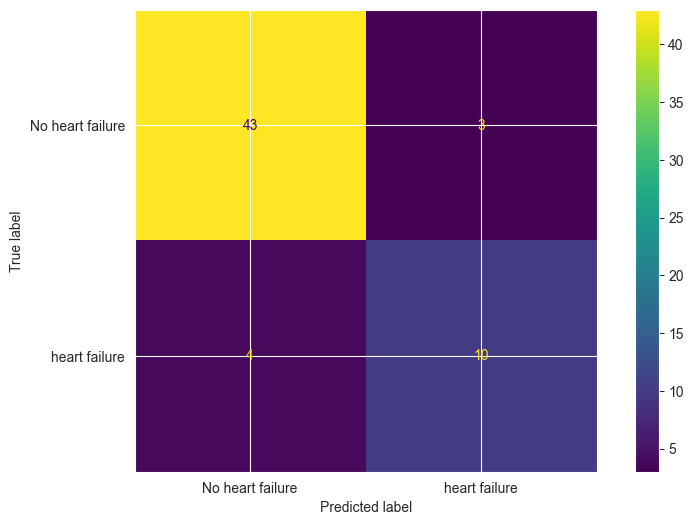

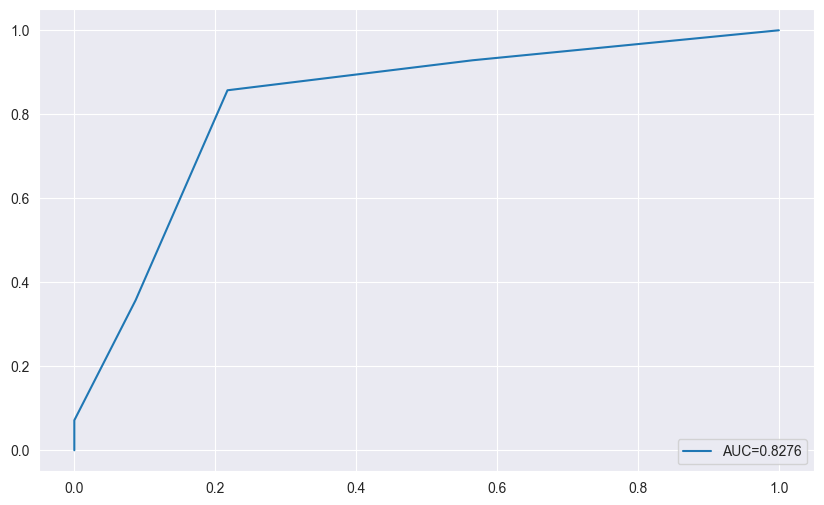

0.8276


In [63]:
sv_clf = SVC(C=0.7, kernel= 'linear', random_state=1, probability= True)
sv_clf.fit(x_train, y_train)
sv_y_pred = sv_clf.predict(x_test)

# evaluation
sv_accuracy = accuracy_score(y_test, sv_y_pred)
sv_report = classification_report(y_test, sv_y_pred)
print("Accuracy:", sv_accuracy)
print("Classification Report:\n", kn_report)

# confusion matrix
cm = confusion_matrix(y_test, sv_y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['No heart failure','heart failure'])
cmd.plot()
plt.show()

# calculate and draw a roc_auc curve
sv_y_pred_proba = kn_clf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, sv_y_pred_proba)
svc_roc_auc = metrics.roc_auc_score(y_test, sv_y_pred_proba)
svc_roc_auc = round(svc_roc_auc, 4)
plt.plot(fpr,tpr,label="AUC="+str(svc_roc_auc))
plt.legend(loc=4)
plt.show()

4. Comparing Models

In [65]:
# build list contains roc auc values of each model
model_list = ['LogisticRegression', 'SVC', 'DecisionTreeClassifier', 'RandomForestClassifier', 'KNearestNeighbours']
roc_auc_score_list = [lr_roc_auc, svc_roc_auc, dt_roc_auc, rf_roc_auc, kn_roc_auc]

roc_auc_score_list

[0.9084, 0.8276, 0.795, 0.9627, 0.8276]

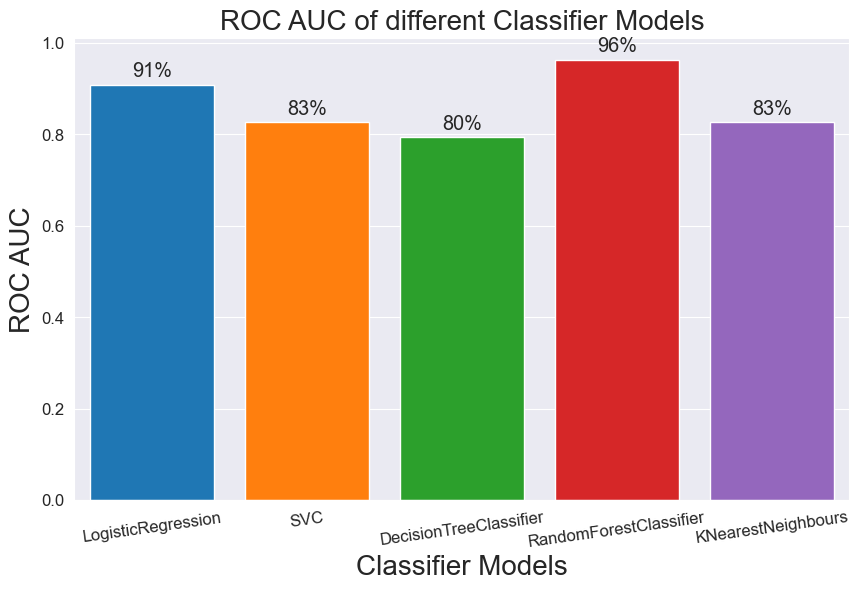

In [66]:
# establish graphs of models comparing
plt.rcParams['figure.figsize']=10,6
sns.set_style('darkgrid')
ax = sns.barplot(x=model_list, y=roc_auc_score_list, palette = "tab10", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('ROC AUC', fontsize = 20)
plt.title('ROC AUC of different Classifier Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height*100)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

In summary, the RandomForestClassifier emerges as the optimal model for the test, boasting an impressive AUC value of 90%, indicative of its strong ability to differentiate between the two classes and its effective performance in this medical scenario. However, in the context of medical cases, a 90% AUC might not be deemed as robust performance. Furthermore, the accuracy score reveals that the test correctly identifies 88% of the sample, accurately pinpointing individuals who will not experience heart failure. Nonetheless, the remaining 12% of errors is a cause for concern, particularly the 57% of cases where the model incorrectly predicts individuals as not having heart failure when they will indeed experience it.

According to the feature analysis, males appear to have twice the likelihood of experiencing heart failure compared to females. It's crucial to highlight that heart failure cases are more prevalent in the age group between 50 and 70. Therefore, it is advisable for individuals in this age bracket to undergo routine heart tests or check-ups. Additionally, factors such as having an ejection fraction below 40%, serum creatinine levels exceeding 1.2, and serum sodium values falling between 135 and 140 are all considered significant risk factors for heart-related issues